# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [2]:
df = pd.read_csv('bank_fin.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [4]:
df['balance'].isna().sum()

25

In [5]:
df.shape

(11162, 17)

In [6]:
df.describe()

,age,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Задание 2

In [7]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

### Задание 3

In [8]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
# Убираем пробелы и знак доллара
df['balance'] = df['balance'].str.replace('$', '', regex=False).str.strip()

In [9]:
# Убираем пробелы между тысячами
df['balance'] = df['balance'].str.replace(' ', '', regex=False)

In [10]:
# Меняем запятую на точку
df['balance'] = df['balance'].str.replace(',', '.', regex=False)

In [11]:
# Преобразуем к float
df['balance'] = df['balance'].astype(float)

In [12]:
df['balance'].head()

0    2343.0
1      45.0
2    1270.0
3    2476.0
4     184.0
Name: balance, dtype: float64

In [13]:
df['balance'].dtype

dtype('float64')

In [14]:
df['balance'].mean()

1529.1290293615875

### Задание 4

In [15]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
# заполняем пропуски в признаки balance медианой по данному признаку
df.loc[(df['balance'].isnull()==True),'balance']=df['balance'].median()

In [16]:
df['balance'].isna().sum()

0

In [17]:
df['balance'].mean()

1526.9360329690019

### Задание 5

In [18]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
# заполняем пропуски в признаки job, заменив их на модальные значения
df.loc[(df['job']=='unknown'),'job']=df['job'].mode()[0]

In [19]:
df['job'].value_counts()

job
management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64

In [20]:
# заполняем пропуски в признаки education, заменив их на модальные значения
df.loc[(df['education']=='unknown'),'education']=df['education'].mode()[0]

In [21]:
df['education'].value_counts()

education
secondary    5973
tertiary     3689
primary      1500
Name: count, dtype: int64

In [22]:
job_mode = df['job'].mode()[0]
education_mode = df['education'].mode()[0]

mask = (df['job'] == job_mode) & (df['education'] == education_mode)
df[mask]['balance'].mean()

1598.8829787234042

### Задание 6

In [23]:
# удалите все выбросы для признака balance
# ваш код
# Находим верхнюю и нижнюю границы поиска выбросов по методу Тьюки
quartile_1, quartile_3 = df['balance'].quantile(0.25), df['balance'].quantile(0.75)
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
print(lower_bound, upper_bound)

-2241.0 4063.0


In [24]:
# Находим выбросы по методу Тьюки
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr(df, 'balance')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10105


In [25]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10105 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10105 non-null  int64  
 1   job        10105 non-null  object 
 2   marital    10105 non-null  object 
 3   education  10105 non-null  object 
 4   default    10105 non-null  object 
 5   balance    10105 non-null  float64
 6   housing    10105 non-null  object 
 7   loan       10105 non-null  object 
 8   contact    10105 non-null  object 
 9   day        10105 non-null  int64  
 10  month      10105 non-null  object 
 11  duration   10105 non-null  int64  
 12  campaign   10105 non-null  int64  
 13  pdays      10105 non-null  int64  
 14  previous   10105 non-null  int64  
 15  poutcome   10105 non-null  object 
 16  deposit    10105 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


## Часть 2:  Разведывательный анализ

### Задание 1

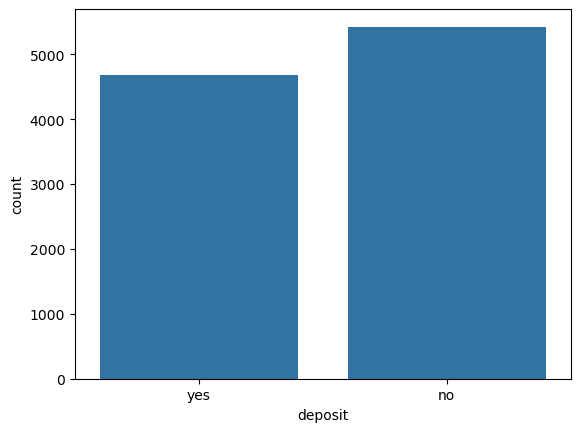

In [26]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
# Строим график на предмет несбалансированности
sns.countplot(data=cleaned, x='deposit');
plt.show()

In [27]:
cleaned['deposit'].value_counts()

deposit
no     5424
yes    4681
Name: count, dtype: int64

### Задания 2 и 3

In [28]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
cleaned.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


In [29]:
from scipy import stats # библиотека для расчетов

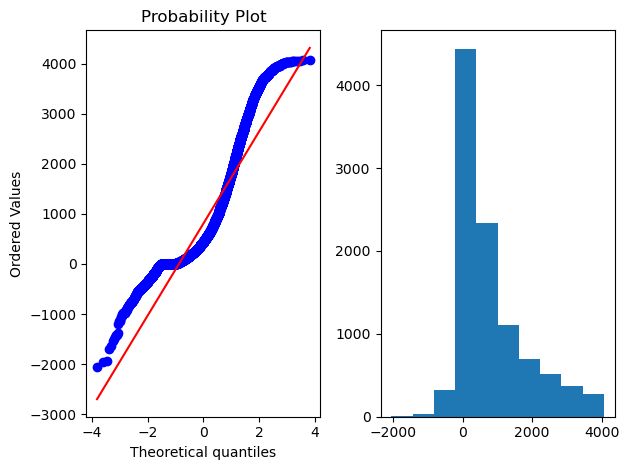

In [30]:
# Строим график распределения признака balance 
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(cleaned['balance'], plot=plt) 

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(cleaned['balance']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show()

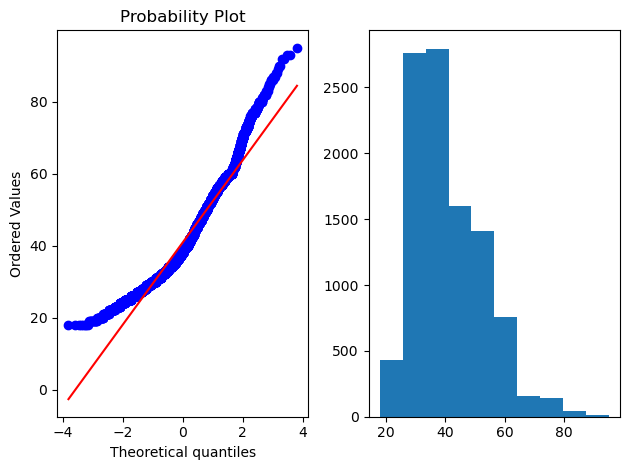

In [31]:
# Строим график распределения признака age 
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(cleaned['age'], plot=plt) 

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(cleaned['age']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show()

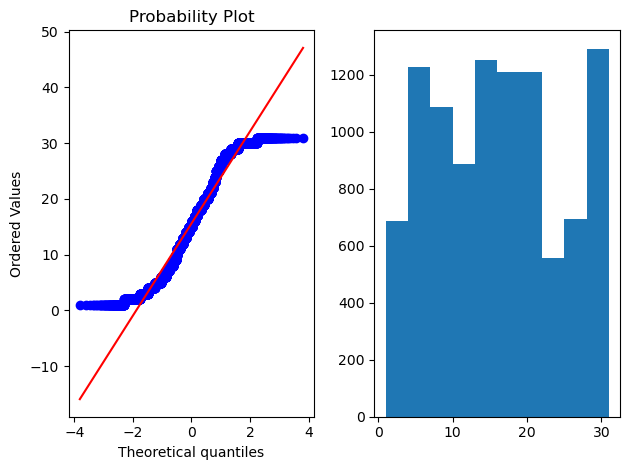

In [32]:
# Строим график распределения признака day
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(cleaned['day'], plot=plt) 

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(cleaned['day']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show()

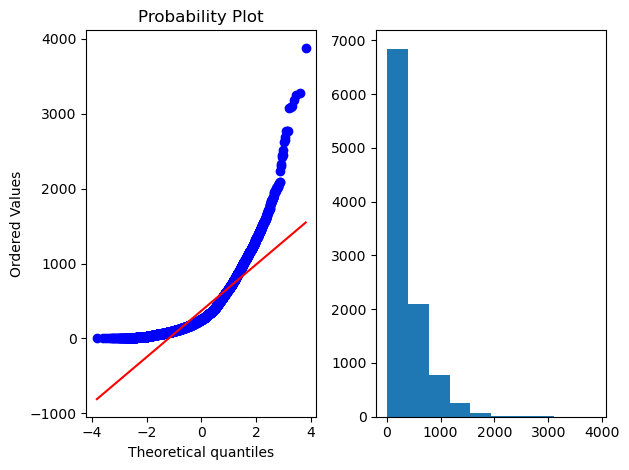

In [33]:
# Строим график распределения признака duration
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(cleaned['duration'], plot=plt) 

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(cleaned['duration']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show()

<Axes: >

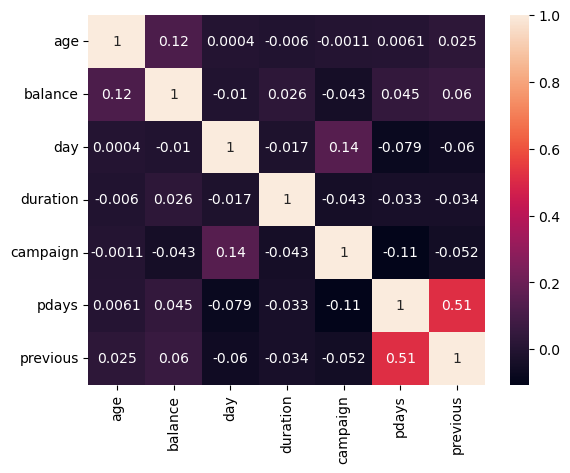

In [34]:
# Смотрим корреляцию числовых признаков
sns.heatmap(cleaned.corr(numeric_only=True), annot=True)

### Задания 4 и 5

In [35]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
cleaned.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


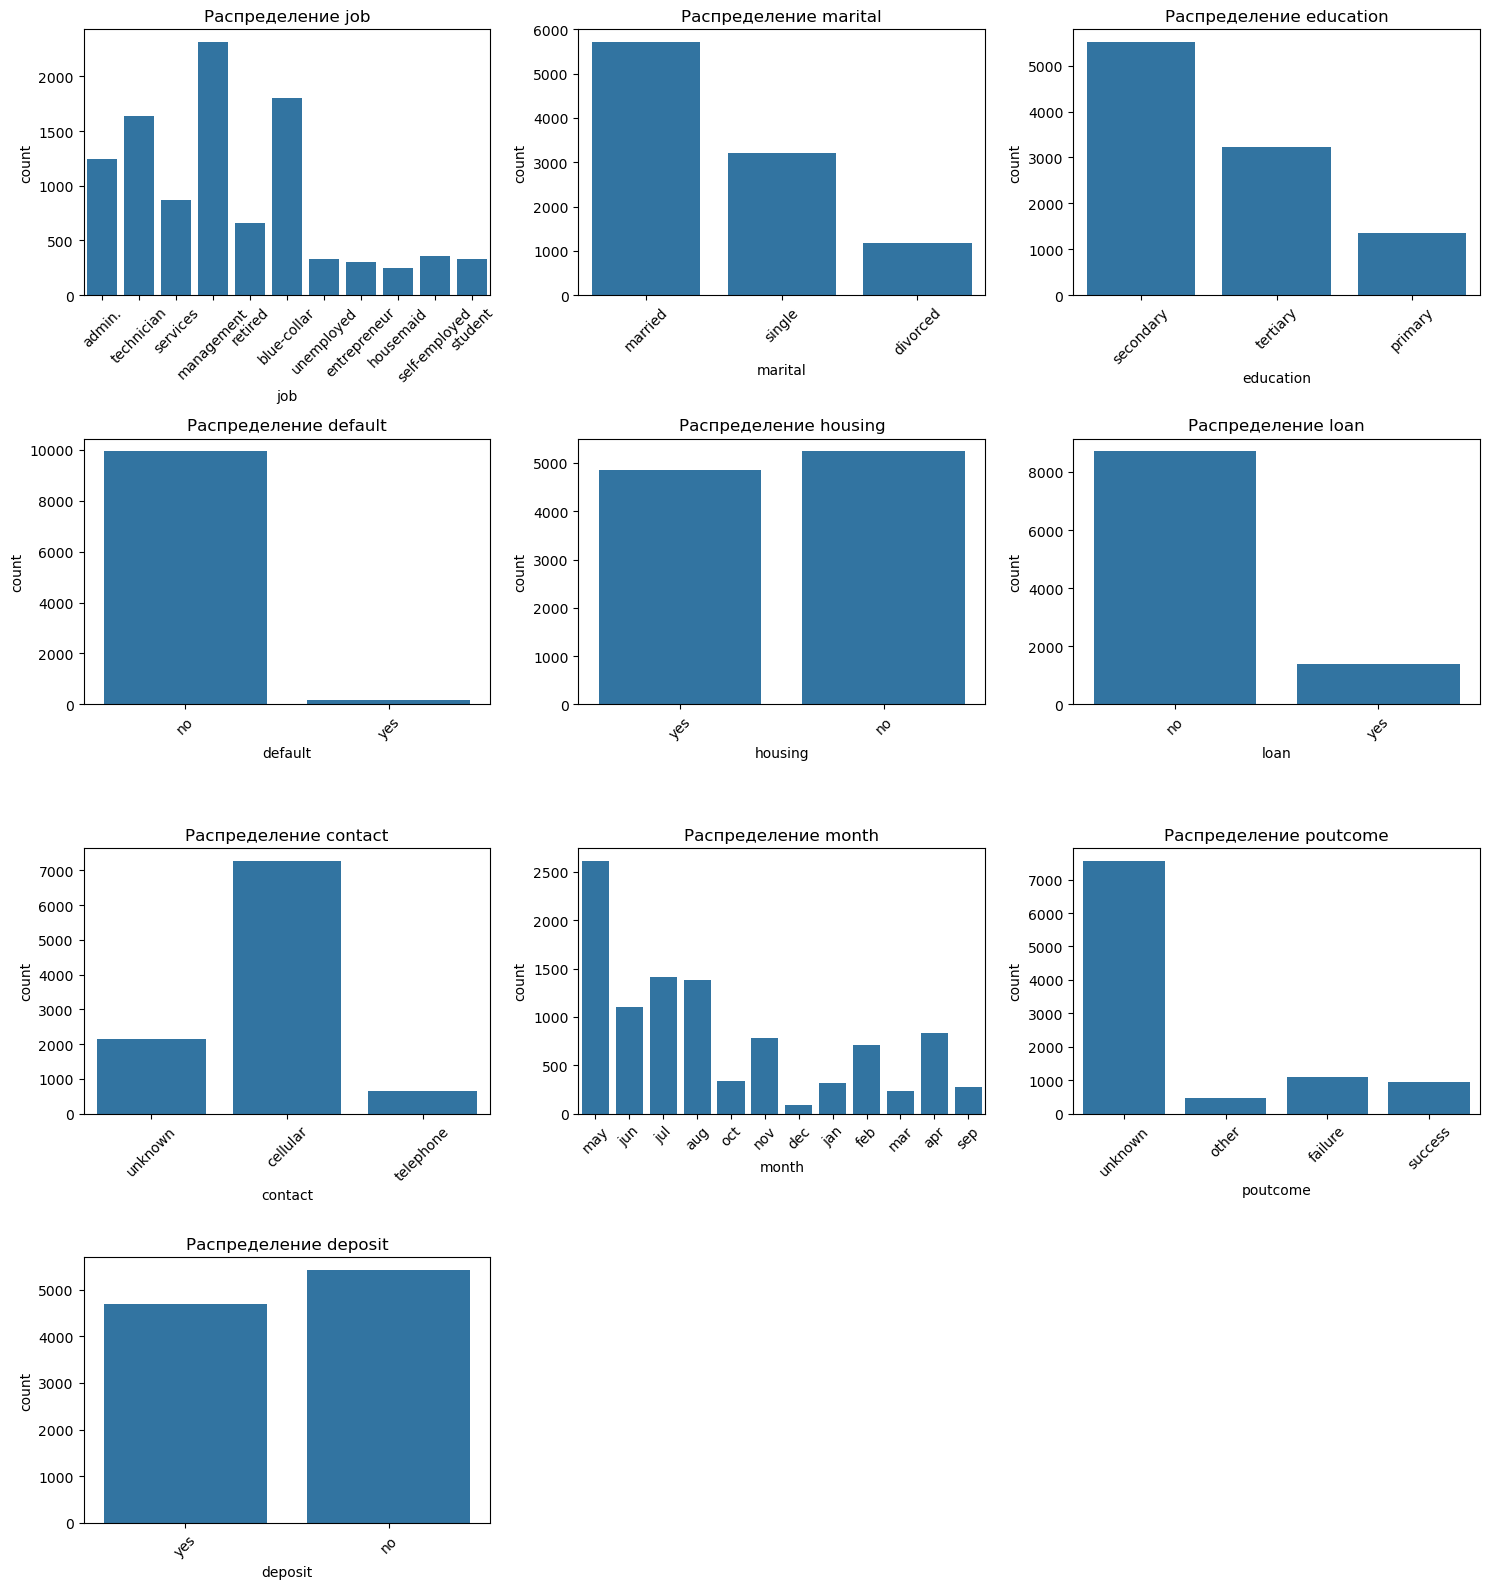

In [36]:
# Строим графики для категориальных данный
column_obj = cleaned[['job', 'marital',	'education', 'default',	'housing',	'loan',	'contact',	'month', 'poutcome', 'deposit']]

# Размер сетки
n_cols = 3
n_rows = (len(column_obj.columns) + n_cols - 1) // n_cols  # округляем вверх

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # чтобы можно было итерировать по оси

for i, col in enumerate(column_obj.columns):
    sns.countplot(data=cleaned, x=col, ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Убираем пустые графики, если они есть
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Задание 6

In [37]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
# Группируем по предыдущему результату кампании
summary = cleaned.groupby('poutcome')['deposit'].value_counts().unstack()

# Вычисляем, где успехов больше, чем отказов
summary['success_dominates'] = summary['yes'] > summary['no']

print(summary)

deposit     no   yes  success_dominates
poutcome                               
failure    562   547              False
other      216   265               True
success     84   861               True
unknown   4562  3008              False


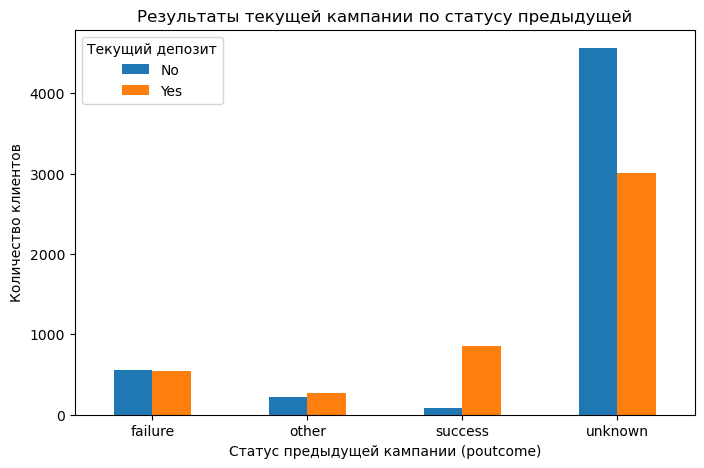

In [38]:
# Посмотрим наглядно
summary = cleaned.groupby('poutcome')['deposit'].value_counts().unstack().fillna(0)
summary = summary.rename(columns={'no': 'No', 'yes': 'Yes'})

# Строим график
summary_plot = summary[['No', 'Yes']].plot(kind='bar', stacked=False, figsize=(8,5))
plt.title('Результаты текущей кампании по статусу предыдущей')
plt.xlabel('Статус предыдущей кампании (poutcome)')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.legend(title='Текущий депозит')
plt.show()

### Вывод
Клиенты, которые ранее уже соглашались на предложение банка, с большей вероятностью согласятся снова.

### Задание 7

In [39]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
# Группируем по месяцу последнего контакта и результату кампании
summary = cleaned.groupby('month')['deposit'].value_counts().unstack()

# Вычисляем, где успехов больше, чем отказов
summary['success_dominates'] = (summary['no']/ (summary['yes'] + summary['no'])) * 100

print(summary)

deposit    no  yes  success_dominates
month                                
apr       317  513          38.192771
aug       775  610          55.956679
dec         9   84           9.677419
feb       323  386          45.557123
jan       194  125          60.815047
jul       836  582          58.956276
jun       606  498          54.891304
mar        24  213          10.126582
may      1776  841          67.863966
nov       456  324          58.461538
oct        62  273          18.507463
sep        46  232          16.546763


### Вывод
Месяц май - самый плохой для контактов о новых предложениях, в этом месяце было больше всего отказов, но так же в этом месяце было больше всего совершено контактов.

### Задание 8

In [40]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
# Создадим новый признак с границами возрастов
bins = [0, 30, 40, 50, 60, 100]  # границы возрастов
labels = ['<30', '30-40', '40-50', '50-60', '60+']  # названия групп

cleaned['age_group'] = pd.cut(cleaned['age'], bins=bins, labels=labels, right=False)

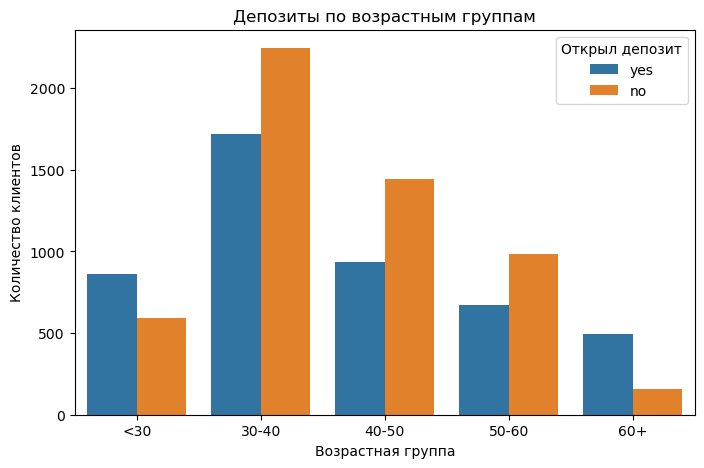

In [41]:
# Строим график распределения депозитов по возрастным группам
plt.figure(figsize=(8,5))
sns.countplot(data=cleaned, x='age_group', hue='deposit')
plt.title('Депозиты по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество клиентов')
plt.legend(title='Открыл депозит')
plt.show()

### Вывод
Люди в возрасте до 30 лет и после 60 лет более склонны открывать депозит, первые только начинают копить, вторые ищут стабильный доход.

### Задания 9 и 10

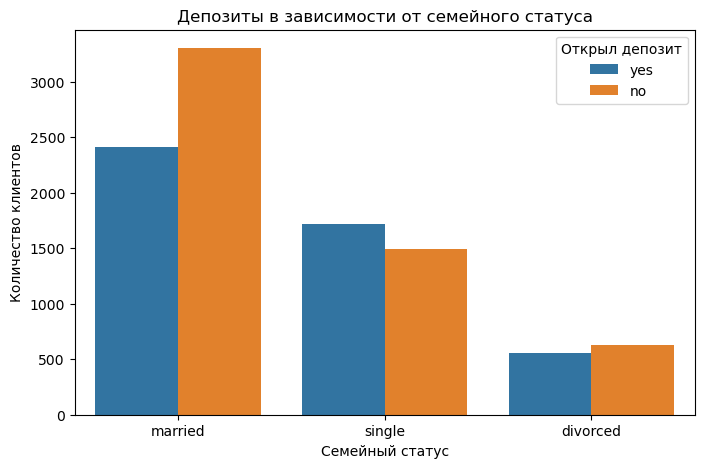

In [42]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
# Строим график распределения депозитов в зависимости от семейного статуса
plt.figure(figsize=(8,5))
sns.countplot(data=cleaned, x='marital', hue='deposit')
plt.title('Депозиты в зависимости от семейного статуса')
plt.xlabel('Семейный статус')
plt.ylabel('Количество клиентов')
plt.legend(title='Открыл депозит')
plt.show()

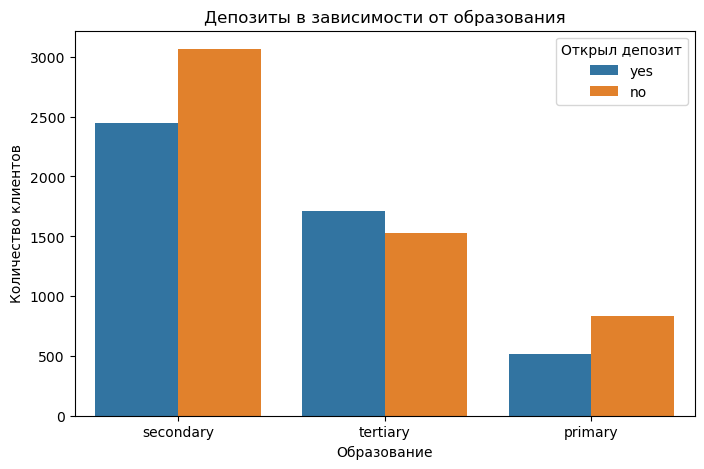

In [43]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
# Строим график распределения депозитов в зависимости от образования
plt.figure(figsize=(8,5))
sns.countplot(data=cleaned, x='education', hue='deposit')
plt.title('Депозиты в зависимости от образования')
plt.xlabel('Образование')
plt.ylabel('Количество клиентов')
plt.legend(title='Открыл депозит')
plt.show()

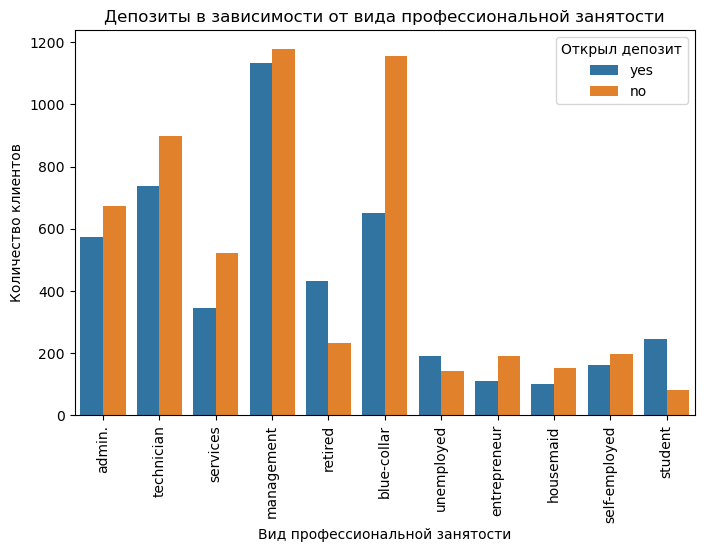

In [44]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
# Строим график распределения депозитов в зависимости от вида профессиональной занятости
plt.figure(figsize=(8,5))
sns.countplot(data=cleaned, x='job', hue='deposit')
plt.title('Депозиты в зависимости от вида профессиональной занятости')
plt.xlabel('Вид профессиональной занятости')
plt.ylabel('Количество клиентов')
plt.legend(title='Открыл депозит')
plt.xticks(rotation=90)  # Повернули подписи на 90 градусов
plt.show()

### Вывод

 - Семейный статус: single клиенты могут быть более гибкими в финансовых решениях и легче откликаться на банковские предложения.

 - Образование: люди с tertiary education чаще открывают депозиты — обычно у них выше финансовая грамотность и стабильный доход.

 - Сфера занятости: пенсионеры, те, кто не работает официально или студенты, возможно, пользуются депозитами как способом безопасного хранения накоплений.


### Задание 11

In [45]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

# Разделяем данные
df_yes = cleaned[cleaned['deposit'] == 'yes']
df_no = cleaned[cleaned['deposit'] == 'no']

# Сводные таблицы
pivot_yes = df_yes.pivot_table(index='education', columns='marital', values='balance', aggfunc='count')
pivot_no = df_no.pivot_table(index='education', columns='marital', values='balance', aggfunc='count')

display(pivot_yes)

marital,divorced,married,single
education,,,
primary,96,339,82
secondary,283,1289,879
tertiary,174,784,755


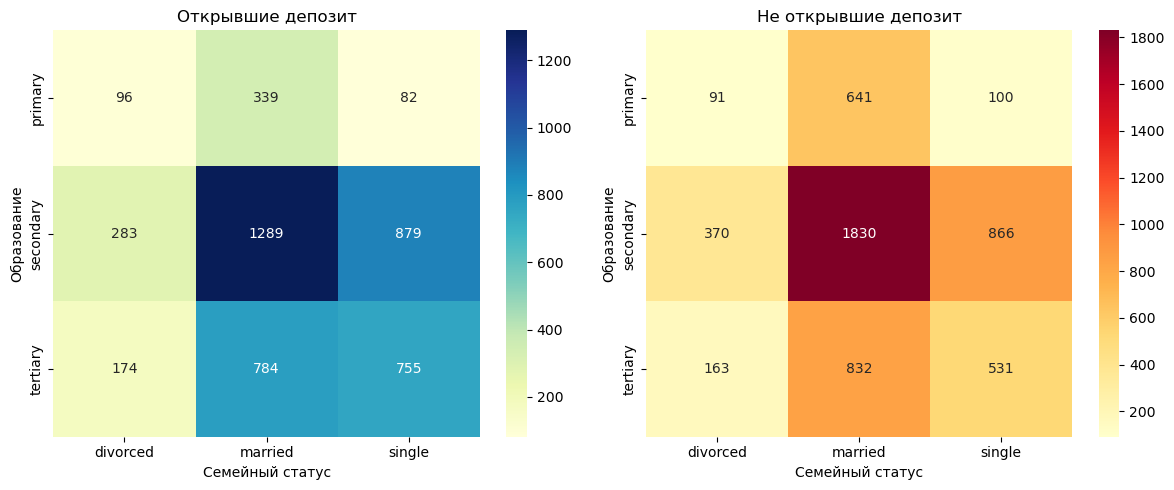

In [46]:
# Визуализация
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(pivot_yes, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Открывшие депозит')
plt.xlabel('Семейный статус')
plt.ylabel('Образование')

plt.subplot(1,2,2)
sns.heatmap(pivot_no, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Не открывшие депозит')
plt.xlabel('Семейный статус')
plt.ylabel('Образование')

plt.tight_layout()
plt.show()

### Вывод
Анализ пересечения категорий семейного положения и уровня образования показал, что чаще всего депозит открывают одинокие клиенты с высшим образованием. В то же время, категории с наибольшим количеством клиентов (например, married с secondary) встречаются и среди открывших, и среди не открывших депозит, поэтому важно оценивать не только абсолютные числа, но и соотношение. Таким образом, образование и семейный статус вместе влияют на склонность клиента открывать депозит.

## Часть 3: преобразование данных

### Задание 1

In [47]:
# преобразуйте уровни образования
cleaned['education'].value_counts()

education
secondary    5517
tertiary     3239
primary      1349
Name: count, dtype: int64

In [48]:
# создаем экземпляр кодировщика
le = LabelEncoder()

# кодируем столбец education
cleaned['education'] = le.fit_transform(cleaned['education'])
cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,1,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,50-60
1,56,admin.,married,1,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,50-60
2,41,technician,married,1,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40-50
3,55,services,married,1,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,50-60
4,54,admin.,married,2,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes,50-60


In [49]:
cleaned['education'].sum()

11995

In [50]:
# кодируем столбец age_group
cleaned['age_group'] = le.fit_transform(cleaned['age_group'])

### Задания 2 и 3

In [51]:
# преобразуйте бинарные переменные в представление из нулей и единиц
binary_features = ['default', 'housing', 'loan', 'deposit']
for col in binary_features:
    cleaned[col] = cleaned[col].map({'no': 0, 'yes': 1})

cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,1,0,2343.0,1,0,unknown,5,may,1042,1,-1,0,unknown,1,2
1,56,admin.,married,1,0,45.0,0,0,unknown,5,may,1467,1,-1,0,unknown,1,2
2,41,technician,married,1,0,1270.0,1,0,unknown,5,may,1389,1,-1,0,unknown,1,1
3,55,services,married,1,0,2476.0,1,0,unknown,5,may,579,1,-1,0,unknown,1,2
4,54,admin.,married,2,0,184.0,0,0,unknown,5,may,673,2,-1,0,unknown,1,2


In [52]:
cleaned.describe()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,age_group
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,1.187036,0.016428,807.653538,0.481148,0.137853,15.590302,368.742603,2.517170,51.319644,0.816230,0.463236,1.332905
std,11.734931,0.647373,0.127119,994.151966,0.499669,0.344762,8.441510,346.651524,2.707159,109.644179,2.243795,0.498671,1.414007
min,18.000000,0.000000,0.000000,-2049.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,95.000000,0.000000,0.000000,8.000000,137.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,38.000000,1.000000,0.000000,445.000000,0.000000,0.000000,15.000000,252.000000,2.000000,-1.000000,0.000000,0.000000,1.000000
75%,48.000000,2.000000,0.000000,1227.000000,1.000000,0.000000,22.000000,490.000000,3.000000,2.000000,1.000000,1.000000,2.000000
max,95.000000,2.000000,1.000000,4063.000000,1.000000,1.000000,31.000000,3881.000000,43.000000,854.000000,58.000000,1.000000,4.000000


In [53]:
sum_of_three = cleaned['default'].mean() + cleaned['loan'].mean() + cleaned['housing'].mean()
print(sum_of_three)

0.6354280059376547


In [54]:
cleaned.describe(include='object')

,job,marital,contact,month,poutcome
count,10105,10105,10105,10105,10105
unique,11,3,3,12,4
top,management,married,cellular,may,unknown
freq,2315,5715,7283,2617,7570


### Задание 4

In [55]:
# создайте дамми-переменные
# создаём список нужных категориальных столбцов
cat_features = ['job', 'marital', 'contact', 'month', 'poutcome']

# применяем get_dummies
df_dummies = pd.get_dummies(cleaned, columns=cat_features, drop_first=True, dtype=int)

df_dummies.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343.0,1,0,5,1042,1,-1,...,0,0,0,1,0,0,0,0,0,1
1,56,1,0,45.0,0,0,5,1467,1,-1,...,0,0,0,1,0,0,0,0,0,1
2,41,1,0,1270.0,1,0,5,1389,1,-1,...,0,0,0,1,0,0,0,0,0,1
3,55,1,0,2476.0,1,0,5,579,1,-1,...,0,0,0,1,0,0,0,0,0,1
4,54,2,0,184.0,0,0,5,673,2,-1,...,0,0,0,1,0,0,0,0,0,1


In [56]:
df_dummies.shape

(10105, 41)

### Задания 5 и 6

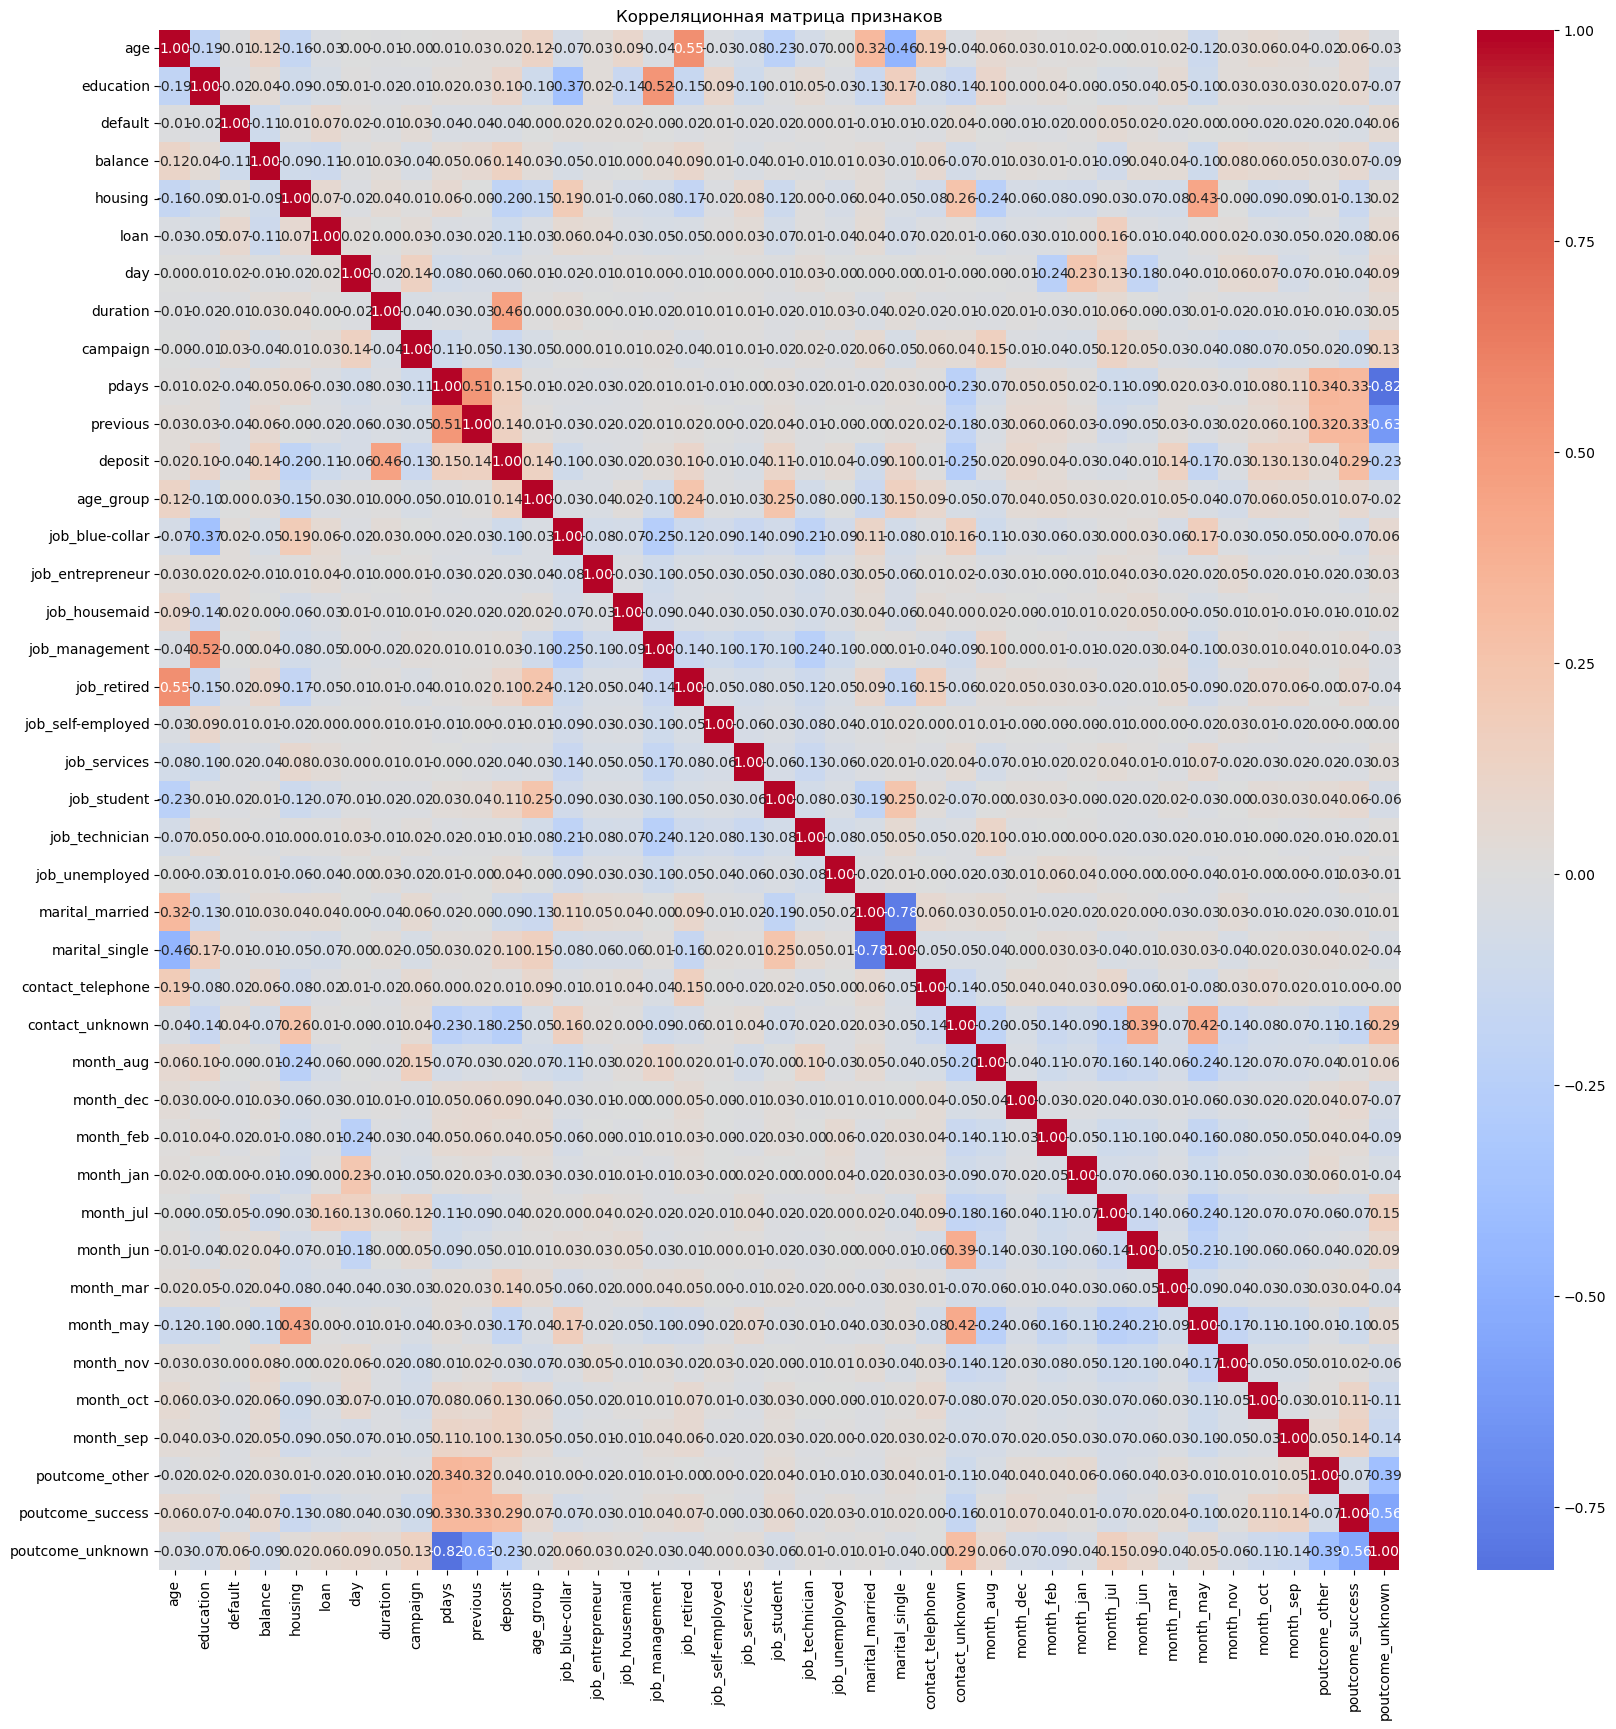

In [57]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
# строим корреляционную матрицу
corr_matrix = df_dummies.corr()

# визуализируем с помощью тепловой карты
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, fmt='.2f', cmap='coolwarm', annot=True, center=0)
plt.title('Корреляционная матрица признаков')
plt.show()

### Вывод
В наших данных несколько признаков сильно коррелируются, но корреляция не превышает 0.85, поэтому мы оставляем все признаки.

### Задания 7 и 8

In [58]:
X = df_dummies.drop(['deposit'], axis=1)
y = df_dummies['deposit']

# Разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [59]:
# рассчитайте необходимые показатели
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (6770, 40)
Test shape: (3335, 40)


In [60]:
y_test.mean()

0.46326836581709147

### Задание 9

In [61]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
selector = SelectKBest(f_classif, k=15)
selector.fit(X_train, y_train)
 
columns1 = selector.get_feature_names_out()
print(columns1)

['balance' 'housing' 'loan' 'duration' 'campaign' 'pdays' 'previous'
 'age_group' 'contact_unknown' 'month_mar' 'month_may' 'month_oct'
 'month_sep' 'poutcome_success' 'poutcome_unknown']


In [62]:
# Создаем матрицу наблюдений X и вектор ответов y с самыми важными признаками
X2 = df_dummies[columns1]
y2 = df_dummies['deposit']

# Разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X2, y2, stratify=y2, random_state = 42, test_size = 0.33)

In [63]:
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (6770, 15)
Test shape: (3335, 15)


### Задание 10

In [64]:
# нормализуйте данные с помощью minmaxsxaler
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

mm_scaler.fit(X_train)

# кодируем тренировочную выборку
X_train_scaled = mm_scaler.transform(X_train)

# Преобразуем промежуточный датасет в полноценный датафрейм
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns1)

# кодируем тестовую выборку
X_test_scaled = mm_scaler.transform(X_test)

# Преобразуем промежуточный датасет в полноценный датафрейм
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns1)

In [65]:
X_test_scaled.describe()

,balance,housing,loan,duration,campaign,pdays,previous,age_group,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
count,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000
mean,0.468237,0.484858,0.131934,0.093294,0.036153,0.062139,0.014501,0.336357,0.209295,0.023688,0.251574,0.031484,0.029385,0.097451,0.743928
std,0.162158,0.499846,0.338470,0.087248,0.063826,0.129784,0.039494,0.352174,0.406867,0.152099,0.433983,0.174649,0.168909,0.296616,0.436527
min,0.017179,0.000000,0.000000,0.000258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352094,0.000000,0.000000,0.034029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.408704,0.000000,0.000000,0.063676,0.023810,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.535504,1.000000,0.000000,0.127224,0.047619,0.033333,0.017241,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,0.999836,1.000000,1.000000,0.797113,0.952381,0.969591,0.948276,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
X_test_scaled.iloc[:, 0].mean()

0.46823674223097866

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [67]:
# обучите логистическую регрессию и рассчитайте метрики качества
#Создаём объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(solver='sag', random_state=42, max_iter=1000)
#Обучаем модель, минизируя logloss
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'sag'
,max_iter,1000
,multi_class,'deprecated'


In [68]:
# Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_scaled)

# Рассчитываем метрикик для тренировочной выборки
print(metrics.classification_report(y_train, y_train_pred))

# Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)

# Рассчитываем F1-меру для тестовой выборки
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3634
           1       0.84      0.77      0.81      3136

    accuracy                           0.83      6770
   macro avg       0.83      0.82      0.83      6770
weighted avg       0.83      0.83      0.83      6770

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1790
           1       0.83      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.81      3335
weighted avg       0.81      0.81      0.81      3335



### Задания 2,3,4

In [69]:
# обучите решающие деревья, настройте максимальную глубину
#Создаём объект класса DecisionTreeClassifier
dt_clf = tree.DecisionTreeClassifier(
    criterion='entropy',  
    random_state=42
)
#Обучаем дерево решений по алгоритму CART
dt_clf.fit(X_train_scaled, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [70]:
#Делаем предсказание класса для тренировочного набора данных
y_pred = dt_clf.predict(X_train_scaled)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       1.00      1.00      1.00      3136

    accuracy                           1.00      6770
   macro avg       1.00      1.00      1.00      6770
weighted avg       1.00      1.00      1.00      6770



In [71]:
#Делаем предсказание класса для тестового набора данных
y_pred = dt_clf.predict(X_test_scaled)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1790
           1       0.72      0.73      0.72      1545

    accuracy                           0.74      3335
   macro avg       0.74      0.74      0.74      3335
weighted avg       0.74      0.74      0.74      3335



In [73]:
#Создаём объект класса DecisionTreeClassifier
dt_clf = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5, #максимальная глубина дерева
    random_state=42
)
#Обучаем дерево решений по алгоритму CART
dt_clf.fit(X_train_scaled, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [74]:
#Делаем предсказание класса для тренировочного набора данных
y_pred = dt_clf.predict(X_train_scaled)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y_train, y_pred))

#Делаем предсказание класса для тестового набора данных
y_pred = dt_clf.predict(X_test_scaled)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3634
           1       0.77      0.81      0.79      3136

    accuracy                           0.80      6770
   macro avg       0.80      0.80      0.80      6770
weighted avg       0.81      0.80      0.80      6770

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1790
           1       0.77      0.80      0.78      1545

    accuracy                           0.79      3335
   macro avg       0.79      0.79      0.79      3335
weighted avg       0.79      0.79      0.79      3335



In [75]:
#Создаём объект класса DecisionTreeClassifier
dt_clf = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6, #максимальная глубина дерева
    random_state=42
)
#Обучаем дерево решений по алгоритму CART
dt_clf.fit(X_train_scaled, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [76]:
#Делаем предсказание класса для тренировочного набора данных
y_pred = dt_clf.predict(X_train_scaled)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y_train, y_pred))

#Делаем предсказание класса для тестового набора данных
y_pred = dt_clf.predict(X_test_scaled)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3634
           1       0.78      0.85      0.81      3136

    accuracy                           0.82      6770
   macro avg       0.82      0.82      0.82      6770
weighted avg       0.82      0.82      0.82      6770

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1790
           1       0.77      0.84      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335



### Задание 5

In [77]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split': [2, 5, 7, 10],
              'max_depth':[3,5,7],
              }
grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search.fit(X_train_scaled, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
y_test_pred = grid_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: user 173 ms, sys: 120 ms, total: 293 ms
Wall time: 3.05 s
accuracy на тестовом наборе: 0.82
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 2}


In [78]:
#Создаём объект класса DecisionTreeClassifier
dt_clf2 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_split=2,
    random_state=42
)
#Обучаем дерево решений по алгоритму CART
dt_clf2.fit(X_train_scaled, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [79]:
#Делаем предсказание класса для тренировочного набора данных
y_pred = dt_clf2.predict(X_train_scaled)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y_train, y_pred))

#Делаем предсказание класса для тестового набора данных
y_pred = dt_clf2.predict(X_test_scaled)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3634
           1       0.81      0.84      0.83      3136

    accuracy                           0.84      6770
   macro avg       0.84      0.84      0.84      6770
weighted avg       0.84      0.84      0.84      6770

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1790
           1       0.79      0.82      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [80]:
# обучите на ваших данных случайный лес
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(n_estimators = 100,
                                    criterion = 'gini',
                                    min_samples_leaf = 5,
                                    max_depth = 10,
                                    random_state = 42
                                    )

#Обучаем модель
rf.fit(X_train_scaled, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train_scaled)
print(metrics.classification_report(y_train, y_train_pred ))
y_test_pred = rf.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_test_pred ))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3634
           1       0.84      0.87      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1790
           1       0.80      0.84      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задания 2 и 3

In [81]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier

# создаём модель градиентного бустинга
gb = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)

# обучаем модель
gb.fit(X_train_scaled, y_train)

# Выводим значения метрики 
y_train_pred = gb.predict(X_train_scaled)
print(metrics.classification_report(y_train, y_train_pred ))
y_test_pred = gb.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_test_pred ))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3634
           1       0.87      0.89      0.88      3136

    accuracy                           0.89      6770
   macro avg       0.89      0.89      0.89      6770
weighted avg       0.89      0.89      0.89      6770

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1790
           1       0.81      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 4

In [82]:
# объедините уже известные вам алгоритмы с помощью стекинга 
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', LogisticRegression(solver='sag', random_state=42, max_iter=1000)),
    ('dt',  DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=2, random_state=42)),
    ('gb', GradientBoostingClassifier(learning_rate=0.05, n_estimators=300, min_samples_leaf=5, max_depth=5, random_state=42))
]

# Создаем объект класса стекинг
reg = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(solver='sag', random_state=42, max_iter=1000)
)
# Обучаем модель
reg.fit(X_train_scaled, y_train)

,estimators,"[('lr', ...), ('dt', ...), ...]"
,final_estimator,LogisticRegre... solver='sag')
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [83]:
# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test_scaled)

# Выводим значения метрики 
print(metrics.classification_report(y_test, y_pred_stack ))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 5

duration            0.500909
poutcome_success    0.116823
contact_unknown     0.076874
balance             0.057653
pdays               0.054785
housing             0.047942
age_group           0.039913
month_mar           0.026157
month_oct           0.019073
campaign            0.015153
dtype: float64


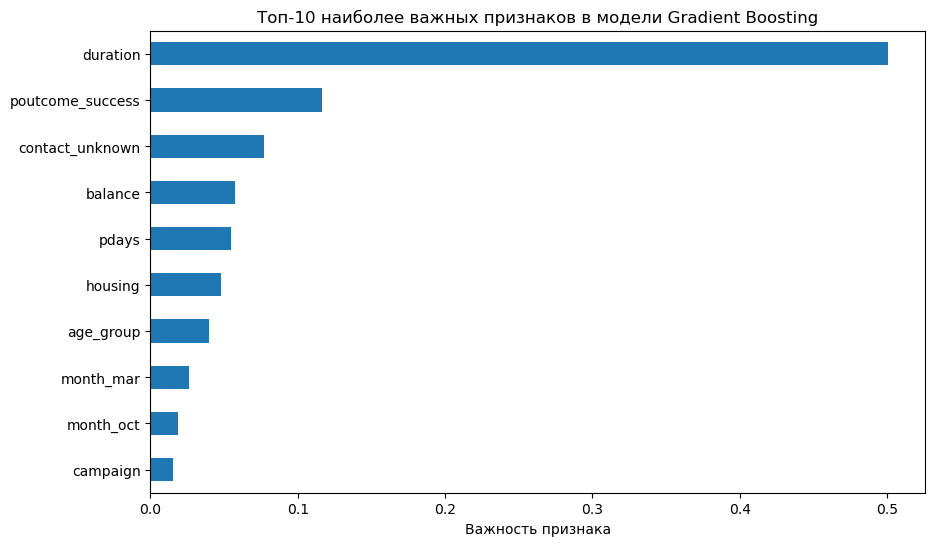

In [84]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
# важность признаков в модели градиентного бустинга
feature_importance = pd.Series(gb.feature_importances_, index=X_train_scaled.columns)

# сортируем по убыванию
feature_importance = feature_importance.sort_values(ascending=False)

# выводим топ-10
print(feature_importance.head(10))

# строим график
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='barh')
plt.title('Топ-10 наиболее важных признаков в модели Gradient Boosting')
plt.xlabel('Важность признака')
plt.gca().invert_yaxis()
plt.show()

### Вывод
Самое большое влияние на модель оказывают признаки: duration, poutcome_success, contact_unknown.

### Задания 6,7,8

In [91]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
# Подбираем гиперпараметры с помощью Optuna
import optuna

def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

In [92]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2025-11-03 12:17:00,958] A new study created in memory with name: RandomForestClassifier
[I 2025-11-03 12:17:01,752] Trial 0 finished with value: 0.8711138884549289 and parameters: {'n_estimators': 132, 'max_depth': 27, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8711138884549289.
[I 2025-11-03 12:17:02,406] Trial 1 finished with value: 0.89549436795995 and parameters: {'n_estimators': 104, 'max_depth': 25, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.89549436795995.
[I 2025-11-03 12:17:03,430] Trial 2 finished with value: 0.8570535853772848 and parameters: {'n_estimators': 196, 'max_depth': 29, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.89549436795995.
[I 2025-11-03 12:17:04,500] Trial 3 finished with value: 0.8594628357276702 and parameters: {'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.89549436795995.
[I 2025-11-03 12:17:05,319] Trial 4 finished with value: 0.8483901219130978 and parameters: {'n_estimato

CPU times: user 19.1 s, sys: 207 ms, total: 19.3 s
Wall time: 19.3 s


In [93]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 174, 'max_depth': 21, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.93


In [94]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82


### Вывод
Попробовав разлиные способы решения задачи: разные модели, подбор гиперпараметров, отбор самых влиятельных признаков, мы пришли к лучшему значению метрик. И эти значения дает модель случайного леса с параметрами 'n_estimators': 174, 'max_depth': 21, 'min_samples_leaf': 2 на 15 самых влиятельных признаках.